https://www.kaggle.com/datasets/iamtanmayshukla/lung-cancer-data

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# Dataset

In [2]:
# Load Dataset
df = pd.read_csv('C:\Deploy\lung cancer survey.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


#Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

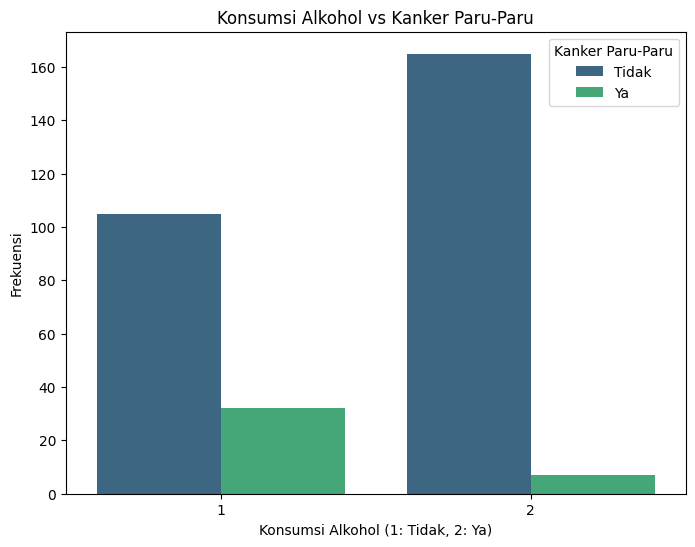

In [6]:
# Membandingkan frekuensi Konsumsi Alkohol vs Kanker Paru-Paru
plt.figure(figsize=(8, 6))
sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=df, palette='viridis')
plt.title('Konsumsi Alkohol vs Kanker Paru-Paru')
plt.xlabel('Konsumsi Alkohol (1: Tidak, 2: Ya)')
plt.ylabel('Frekuensi')
plt.legend(title='Kanker Paru-Paru', labels=['Tidak', 'Ya'])
plt.show()

# Preprocessing

In [7]:
le=LabelEncoder()
df["GENDER"]=le.fit_transform(df["GENDER"])
df["LUNG_CANCER"]=le.fit_transform(df["LUNG_CANCER"])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


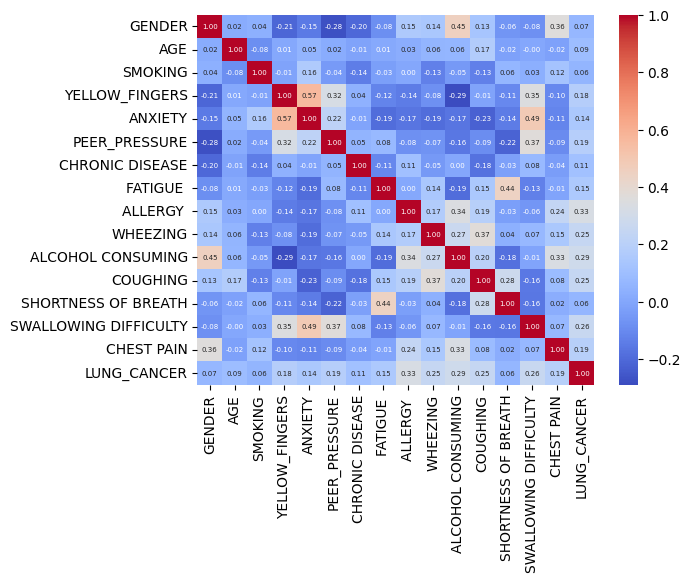

In [8]:
# matrix korelasi
correlation_matrix = df.corr()
annot_kws = {"size": 5}
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws=annot_kws)
plt.show()

In [9]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['LUNG_CANCER'].abs().sort_values(ascending=False)
print(correlation_with_target)

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


In [10]:
# Membuat feature X dan target Y
X = df[['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY','CHEST PAIN']]
y = df['LUNG_CANCER']

In [11]:
std = StandardScaler()
X_scaled = std.fit_transform(X)

In [12]:
#sebelum SMOTE
print("Class distribution before oversampling:")
print(y.value_counts())

Class distribution before oversampling:
LUNG_CANCER
1    270
0     39
Name: count, dtype: int64


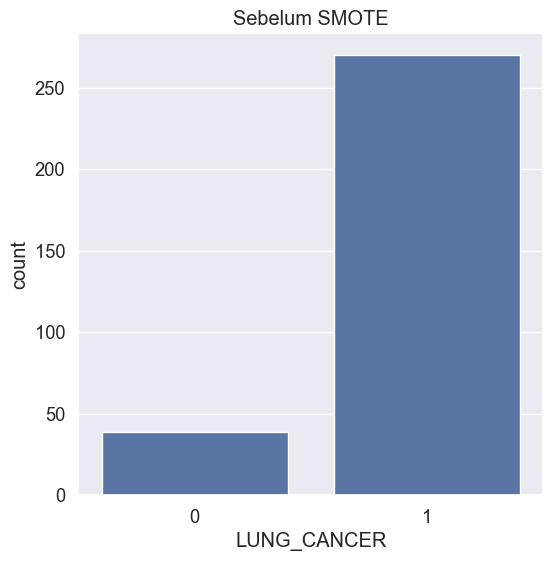

In [13]:
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.countplot(x=pd.Series(y))
plt.title('Sebelum SMOTE')
plt.show()

In [14]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_scaled,y)

In [15]:
print(pd.Series(y_train_resampled).value_counts())

LUNG_CANCER
1    270
0    270
Name: count, dtype: int64


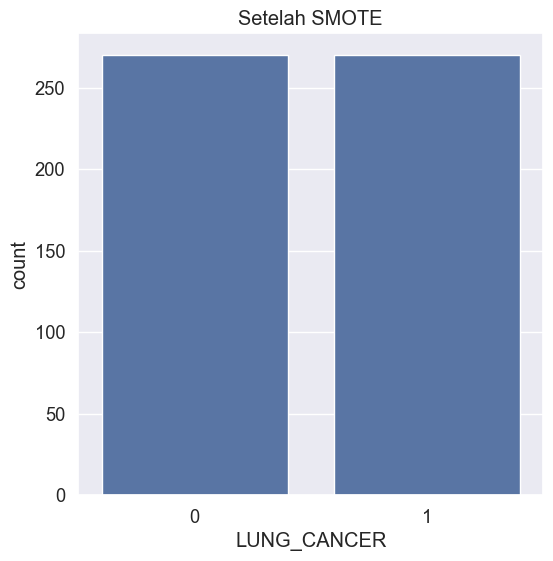

In [16]:
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.countplot(x=pd.Series(y_train_resampled))
plt.title('Setelah SMOTE')
plt.show()

#Model

In [17]:
# Splite data
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.2,random_state=42)

In [18]:
print(len(X_train))
print(len(y_train))

432
432


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Training model
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [20]:
# Prediksi pada data uji
y_pred_knn = knn_model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
print("Accuracy:",accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        51
           1       0.96      0.89      0.93        57

    accuracy                           0.93       108
   macro avg       0.93      0.93      0.93       108
weighted avg       0.93      0.93      0.93       108

[[49  2]
 [ 6 51]]
Accuracy: 0.9259259259259259


In [21]:
# Hyperparameter Tuning for KNN
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [22]:
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print(f'Nilai k terbaik dari GridSearchCV: {best_k}')
print(f'Accuracy untuk k terbaik: {best_accuracy*100}%')

Nilai k terbaik dari GridSearchCV: 9
Accuracy untuk k terbaik: 94.25925925925925%


In [23]:
for K in range(0, 10):
    K_value = K + 1
    neighbor = KNeighborsClassifier(n_neighbors= K_value)
    neighbor.fit(X_train, y_train)
    y_pred = neighbor.predict(X_test)
    print( "Accuracy is ", accuracy_score(y_test, y_pred)*100,"% for K-Value:",K_value)

Accuracy is  90.74074074074075 % for K-Value: 1
Accuracy is  91.66666666666666 % for K-Value: 2
Accuracy is  90.74074074074075 % for K-Value: 3
Accuracy is  89.81481481481481 % for K-Value: 4
Accuracy is  89.81481481481481 % for K-Value: 5
Accuracy is  89.81481481481481 % for K-Value: 6
Accuracy is  89.81481481481481 % for K-Value: 7
Accuracy is  89.81481481481481 % for K-Value: 8
Accuracy is  90.74074074074075 % for K-Value: 9
Accuracy is  88.88888888888889 % for K-Value: 10


In [24]:
# Evaluasi model dengan nilai k terbaik pada data pengujian
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi pada data pengujian dengan k terbaik: {accuracy:.2f}')

Akurasi pada data pengujian dengan k terbaik: 0.95


In [25]:
# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        51
           1       0.98      0.93      0.95        57

    accuracy                           0.95       108
   macro avg       0.95      0.96      0.95       108
weighted avg       0.96      0.95      0.95       108



In [26]:
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix (Test Set):
[[50  1]
 [ 4 53]]


In [27]:
from sklearn.svm import SVC

In [28]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Training model
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [29]:
# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)

In [30]:
# Evaluasi model
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        51
           1       0.94      0.84      0.89        57

    accuracy                           0.89       108
   macro avg       0.89      0.89      0.89       108
weighted avg       0.89      0.89      0.89       108

[[48  3]
 [ 9 48]]
Accuracy: 0.8888888888888888


In [31]:
# Hyperparameter Tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [32]:
print("Best hyperparameters for SVM:", grid_search_svm.best_params_)
print("Best accuracy score for SVM:", grid_search_svm.best_score_)

Best hyperparameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy score for SVM: 0.95


In [33]:
best_svm_model = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred_best_svm))
print(confusion_matrix(y_test, y_pred_best_svm))
print("Accuracy for tuned SVM:", accuracy_score(y_test, y_pred_best_svm))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.93      0.96        57

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108

[[51  0]
 [ 4 53]]
Accuracy for tuned SVM: 0.9629629629629629


In [35]:
print(pd.Series(y_train_resampled).value_counts())

LUNG_CANCER
1    270
0    270
Name: count, dtype: int64


In [36]:
# Cek jumlah fitur yang dipelajari model
print("Jumlah fitur yang dipelajari model:", svm_model.n_features_in_)


Jumlah fitur yang dipelajari model: 11


In [37]:
import pickle

# Simpan model ke file .pkl
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)
print("Model berhasil disimpan sebagai svm_model.pkl")

Model berhasil disimpan sebagai svm_model.pkl


In [38]:
with open('svm_model.pkl', 'rb') as file:
    loaded_svm_model = pickle.load(file)

In [46]:
new_data = {
    'YELLOW_FINGERS': [1], 
    'ANXIETY': [1], 
    'PEER_PRESSURE': [1], 
    'CHRONIC DISEASE': [1], 
    'FATIGUE ': [1], 
    'ALLERGY ': [1], 
    'WHEEZING': [1], 
    'ALCOHOL CONSUMING': [1], 
    'COUGHING': [1], 
    'SWALLOWING DIFFICULTY': [1],
    'CHEST PAIN': [1],
}

In [47]:
new_df = pd.DataFrame(new_data)

In [48]:
predicted_kanker_paru = loaded_svm_model.predict(new_df)

print("Hasil:", predicted_kanker_paru)

Hasil: [1]
